In [177]:
# Generales
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pydot as pyd
import time
import joblib
from natsort import natsort_keygen

# image preprocessing
import os
import sys
import shutil
import glob
import matplotlib.image as mpimg
from PIL import Image

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, jaccard_score,\
                            f1_score, precision_recall_curve,\
                            confusion_matrix, ConfusionMatrixDisplay,\
                            silhouette_score, mutual_info_score,\
                            adjusted_mutual_info_score, normalized_mutual_info_score,\
                            adjusted_rand_score


# Constants

In [19]:
# Constants

# dirs
samples_dir = "./samples1_512_fixed/"
samples_equiv_dir = "./samples1_512_equiv_fixed/"

# init
start_num = 1

height, width = 32, 32

# placeholder
r = "rule_"

# Classes
class1 = [0, 8, 32, 40, 128, 136, 160, 168]
class2 = [
          1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 
          23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 
          42, 43, 44, 46, 50, 51, 56, 57, 58, 62, 72, 73, 74, 
          76, 77, 78, 94, 104, 108, 130, 132, 134, 138, 140, 
          142, 152, 154, 156, 162, 164, 170, 172, 178, 184, 
          200, 204, 232
        ]
class3 = [18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150]
class4 = [41, 54, 106, 110]


# Classes
class1_equiv = [0, 255,
        8, 64, 239, 253,
        32, 251,
        40, 96, 235, 249,
        128, 254,
        136, 192, 238, 252,
        160, 250,
        168, 224, 234, 248]

class2_equiv = [1, 127,
        2, 16, 191, 247,
        3, 17, 63, 119,
        4, 223,
        5, 95,
        6, 20, 159, 215,
        7, 21, 31, 87,
        9, 65, 111, 125,
        10, 80, 175, 245,
        11, 47, 81, 117,
        12, 68, 207, 221,
        13, 69, 79, 93,
        14, 84, 143, 213,
        15, 85,
        19, 55,
        23,
        24, 66, 189, 231,
        25, 61, 67, 103,
        26, 82, 167, 181,
        27, 39, 53, 83,
        28, 70, 157, 199,
        29, 71,
        33, 123,
        34, 48, 187, 243,
        35, 49, 59, 115,
        36, 219,
        37, 91,
        38, 52, 155, 211,
        42, 112, 171, 241,
        43, 113,
        44, 100, 203, 217,
        46, 116, 139, 209,
        50, 179,
        51,
        56, 98, 185, 227,
        57, 99,
        58, 114, 163, 177,
        62, 118, 131, 145,
        72, 237,
        73, 109,
        74, 88, 173, 229,
        76, 205,
        77,
        78, 92, 141, 197,
        94, 133,
        104, 233,
        108, 201,
        130, 144, 190, 246,
        132, 222,
        134, 148, 158, 214,
        138, 174, 208, #244,
        140, 196, 206, 220,
        142, 212,
        152, 188, 194, 230,
        154, 166, 180, 210,
        156, 198,
        162, 176, 186, 242,
        164, 218,
        170, 240,
        172, 202, 216, 228,
        178,
        184, 226,
        200, 236,
        204,
        232]
class3_equiv = [18, 183,
        22, 151,
        30, 86, 135, 149,
        45, 75, 89, 101,
        60, 102, 153, 195,
        90, 165,
        105,
        122, 161,
        126, 129,
        146, 182,
        150]
class4_equiv = [41, 97, 107, 121,
        54, 147,
        106, 120, 169, 225,
        110, 124, 137, 193]

# Wolfram Classification

In [20]:
print(samples_dir, samples_equiv_dir)

./samples1_512_fixed/ ./samples1_512_equiv_fixed/


In [21]:
def getPics(class_rules, samples_dir, n_samples_per_rule=None):
    class_imgs = []

    for r in class_rules:
        imgs_dir = samples_dir + f'rule_{str(r)}/'
        imgs_temp = [imgs_dir + f for f in os.listdir(imgs_dir)]
        class_imgs += imgs_temp[:n_samples_per_rule] # class balancing
    return class_imgs
# get image names simplified classes
c1_img_list = getPics(class1, samples_dir, -1)
c2_img_list = getPics(class2, samples_dir, -1)
c3_img_list = getPics(class3, samples_dir, -1)
c4_img_list = getPics(class4, samples_dir, -1)

files_target = [np.full(len(c1_img_list), 1), 
                np.full(len(c2_img_list), 2), 
                np.full(len(c3_img_list), 3), 
                np.full(len(c4_img_list), 4)]
print([x.shape[0] for x in files_target])

# get image names full classes
c1_equiv_img_list = getPics(class1_equiv, samples_equiv_dir, -1)
c2_equiv_img_list = getPics(class2_equiv, samples_equiv_dir, -1)
c3_equiv_img_list = getPics(class3_equiv, samples_equiv_dir, -1)
c4_equiv_img_list = getPics(class4_equiv, samples_equiv_dir, -1)

files_target_equiv = [np.full(len(c1_equiv_img_list), 1), 
                np.full(len(c2_equiv_img_list), 2), 
                np.full(len(c3_equiv_img_list), 3), 
                np.full(len(c4_equiv_img_list), 4)]
print([x.shape[0] for x in files_target_equiv])


[16372, 16575, 14066, 16372]
[49120, 48705, 46556, 46552]


In [22]:
# ez gpt
def parse_rule(w):
  return w.split('/')[2]

def sort_by_column(df, col):
    df2 = df.sort_values(by=col, key=natsort_keygen())
    return df2
  
def group_by_two_columns(df, col1, col2, col3):
    df2 = df.groupby([col1, col2]).size().reset_index(name=col3)
    return df2

In [23]:
c_x = np.array(c1_img_list
               +c2_img_list
               +c3_img_list
               +c4_img_list)

c_y = np.concatenate((files_target[0],
                      files_target[1],
                      files_target[2],
                      files_target[3]))

dataset = pd.DataFrame({'img':c_x,
                        'class':c_y})

dataset['img'] = dataset['img'].apply(parse_rule)
original_labels = sort_by_column(dataset.groupby(by=['img','class'])\
                                 .count()\
                                 .reset_index(),
                                 'img')

original_labels

,img,class
0,rule_0,1
1,rule_1,2
38,rule_2,2
50,rule_3,2
59,rule_4,2
...,...,...
34,rule_178,2
36,rule_184,2
39,rule_200,2
40,rule_204,2


In [24]:
c_x_eq = np.array(  c1_equiv_img_list
               + c2_equiv_img_list
               + c3_equiv_img_list
               + c4_equiv_img_list)

c_y_eq = np.concatenate((files_target_equiv[0],
                         files_target_equiv[1],
                         files_target_equiv[2],
                         files_target_equiv[3]))

dataset2 = pd.DataFrame({'img':c_x_eq, 
                         'class':c_y_eq})

dataset2['img'] = dataset2['img'].apply(parse_rule)
original_labels_equiv = sort_by_column(dataset2.groupby(by=['img','class'])\
                                       .count()\
                                       .reset_index(),
                                       'img')

original_labels_equiv

,img,class
0,rule_0,1
1,rule_1,2
112,rule_2,2
178,rule_3,2
189,rule_4,2
...,...,...
169,rule_251,1
170,rule_252,1
171,rule_253,1
172,rule_254,1


# Clustering Results

In [199]:
!ls

drive	 results.zip  samples1_512_equiv_fixed	    samples1_512_fixed
results  sample_data  samples1_512_equiv_fixed.zip  samples1_512_fixed.zip


In [200]:
def load_results_data():
    rd = {}
    rde = {}
    rn = []
    rne = []
    results_dir = './results/'
    for filename in os.listdir(results_dir):
        result_type = filename.split('.')[0]
        r_df = pd.read_csv(results_dir + filename).sort_values(by=['img'])
        r_df['name'] = r_df.img.apply(lambda x: x.split('/')[2])
        if 'all' in result_type:
            rde[result_type] = {'data': r_df, 'classes':r_df['y_pred'].unique()}
            rne.append(result_type)
        else:
            rd[result_type] = {'data': r_df, 'classes':r_df['y_pred'].unique()}
            rn.append(result_type)
    return rd, rde, rn, rne

results_dict, results_equiv_dict, result_names, result_names_equiv = load_results_data()

In [201]:
result_names

['agglomerative_dbindex_euclidean',
 'kmeans_silhouette_euclidean',
 'dbscan_silhouette_euclidean',
 'agglomerative_derivative_euclidean',
 'agglomerative_silhouette_euclidean']

In [202]:
result_names_equiv

['all_imgs_dbscan_silhouette_euclidean',
 'all_imgs_agglomerative_silhouette_euclidean',
 'all_imgs_agglomerative_derivative_euclidean',
 'all_imgs_agglomerative_dbindex_euclidean',
 'all_imgs_kmeans_silhouette_euclidean']

In [203]:
def process_results_dict(rf, rn):
    nr = {}
    for name in rn:
        grouped_data = group_by_two_columns(rf[name]['data'], 'name', 'y_pred', 'sum')
        ordered = sort_by_column(grouped_data, 'name')
        nr[name] = {'name':name, 'data': ordered, 'classes':rf[name]['classes']}
    return nr

new_results = process_results_dict(results_dict, result_names)
new_results_equiv = process_results_dict(results_equiv_dict, result_names_equiv)

In [204]:
def get_classification(info, rules):
  rules_ids = []
  for n in rules:
    temp = info.loc[info['name'] == n]
    ix = temp['sum'].idxmax()
    rules_ids.append(ix)
  return rules_ids

In [205]:
r = class1 + class2 + class3 + class4 
r = [f'rule_{i}' for i in r]

r_eq = class1_equiv + class2_equiv + class3_equiv + class4_equiv
r_eq = [f'rule_{i}' for i in r_eq]

for k in new_results_equiv.keys():
  d = new_results_equiv[k]['data'].copy()
  ids = get_classification(d, r_eq)
  classification = d[d.index.isin(ids)][['name', 'y_pred']]
  new_results_equiv[k]['results'] = classification.reset_index(drop=True)

for k in new_results.keys():
  d = new_results[k]['data'].copy()
  ids = get_classification(d, r)
  classification = d[d.index.isin(ids)][['name', 'y_pred']]
  new_results[k]['results'] = classification.reset_index(drop=True)

In [206]:
new_results_equiv['all_imgs_dbscan_silhouette_euclidean']['results'].head()

,name,y_pred
0,rule_0,1
1,rule_1,-1
2,rule_2,-1
3,rule_3,-1
4,rule_4,-1


# Plots

In [33]:
pd.options.plotting.backend = "plotly"

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [161]:
# result_names.remove('agglomerative_derivative_euclidean')
rows = len(result_names) + 1
cols = 1
fig = make_subplots(rows=rows,
                    cols=cols,
                    shared_xaxes=True)
fig.update_yaxes(tickmode='linear')

for i, x in enumerate(result_names):
  if x == 'agglomerative_derivative_euclidean':
    pass
  res = new_results[x]['results']
  c = res['y_pred'].unique()
  print( f'classes:{c}')
  fig.add_trace(go.Scatter(
      x=res['name'],
      y=res['y_pred'],
      mode="markers",
      name=new_results[x]['name'],
  ), row=i+1, col=1)

fig.add_trace(go.Scatter(
      x=original_labels['img'],
      y=original_labels['class'],
      mode="markers",
      name='original labels',
  ), row=rows, col=1)

fig.update_layout(
    title="Clustering Results: Equivalent rules not included",
    height=900,
    width=2000,
    legend_title="Experiment",
    yaxis=dict(title='Classes'),
    )
fig.show()

classes:[4 3 2 1 0]
classes:[ 0  2  1 -1]
classes:[-1  4  1  2  3  0]
classes:[3 1 2]
classes:[3 0 2 1 4]


In [162]:
# result_names_equiv.remove('all_imgs_agglomerative_derivative_euclidean')
rows = len(result_names_equiv) +1
cols = 1
fig = make_subplots(rows=rows,
                    cols=cols,
                    shared_xaxes=True)
fig.update_xaxes(tickmode='linear', dtick=1 )

for i, x in enumerate(result_names_equiv):
  res = new_results_equiv[x]['results']
  c = res['y_pred'].unique()
  print( f'classes:{c}')
  fig.add_trace(go.Scatter(
      x=res['name'],
      y=res['y_pred'],
      mode="markers",
      name=new_results_equiv[x]['name'],
  ), row=i+1, col=1)

fig.add_trace(go.Scatter(
      x=original_labels_equiv['img'],
      y=original_labels_equiv['class'],
      mode="markers",
      name='original labels',
  ), row=rows, col=1)

fig.update_layout(
    title="Clustering Results: Equivalent rules included",
    height=900,
    width=3500,
    legend_title="Experiment",
    )

fig.show()

classes:[ 1 -1]
classes:[0 1 3 2]
classes:[1 6 2 3 5 4]
classes:[3 2 4 0]
classes:[-1  1  2  0]


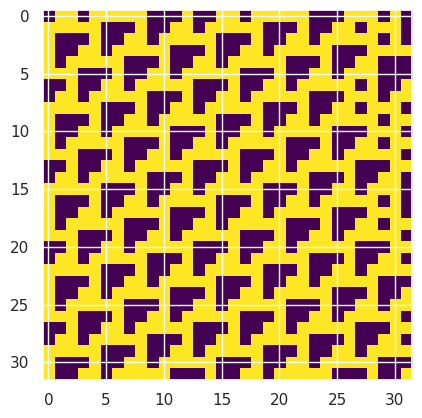

In [40]:
files_110 = os.listdir(samples_equiv_dir + "rule_110")[0]
img = Image.open(samples_equiv_dir + "rule_110/" + files_110)
plt.imshow(img)

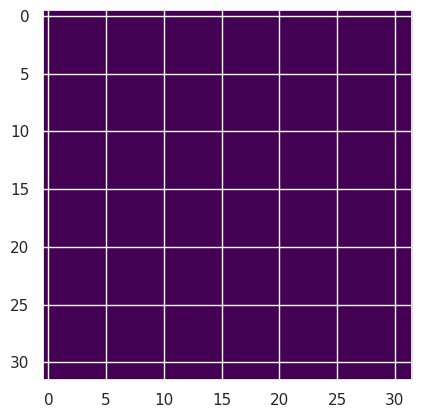

In [42]:
files_0 = os.listdir(samples_equiv_dir + "rule_0")[0]

img = Image.open(samples_equiv_dir + "rule_0/"+files_0)
plt.imshow(img)
plt.show()

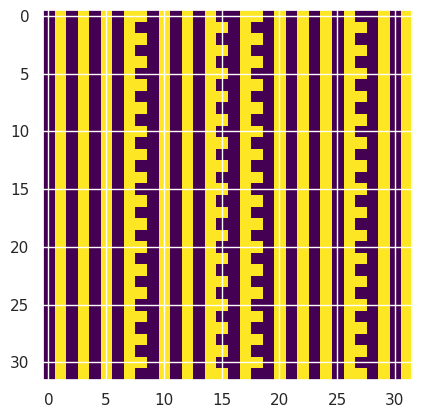

In [43]:
files_106 = os.listdir(samples_equiv_dir + "rule_156")[0]

img = Image.open(samples_equiv_dir + "rule_156/"+files_106)
plt.imshow(img)
plt.show()

# Clustering Comparison Scores

In [207]:
def calculate_scores(d, original):
  scores_dict = {}
  y = original['class'].values
  for k in d.keys():
    labels = d[k]['results']['y_pred'].values
    scores_dict[d[k]['name']] = [normalized_mutual_info_score(y, labels),
                                 adjusted_rand_score(y, labels)]#scores_df.T
  return scores_dict

In [208]:
new_results_equiv['scores'] = calculate_scores(new_results_equiv,
                                               original_labels_equiv)

In [209]:
new_results['scores'] = calculate_scores(new_results,
                                               original_labels)

In [210]:
for k in new_results['scores'].keys():
  print(k, new_results['scores'][k], '\n')

agglomerative_dbindex_euclidean [0.32029108862226796, 0.15240933599858664] 

kmeans_silhouette_euclidean [0.5091608116670614, 0.4179398169193466] 

dbscan_silhouette_euclidean [0.10434365692265217, 0.0014478543186972487] 

agglomerative_derivative_euclidean [0.19868283536310433, 0.1512788524128526] 

agglomerative_silhouette_euclidean [0.5373899905409965, 0.34214146386662836] 



In [211]:
for k in new_results_equiv['scores'].keys():
  print(k, new_results_equiv['scores'][k], '\n')

all_imgs_dbscan_silhouette_euclidean [0.5200356998163609, 0.4703997373815613] 

all_imgs_agglomerative_silhouette_euclidean [0.4282083683892753, 0.30627387952980883] 

all_imgs_agglomerative_derivative_euclidean [0.4309688448388637, 0.2482232983063993] 

all_imgs_agglomerative_dbindex_euclidean [0.23493324827173165, 0.1708219738905988] 

all_imgs_kmeans_silhouette_euclidean [0.4338258929487444, 0.31074097397439443] 



In [212]:
adjusted_rand_score([0, 0, -1, -1, 3], [1, 1, 0, 4, 9])

0.6153846153846154